# Section 3


In [20]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Question 3 
Plot both X and conv(X).

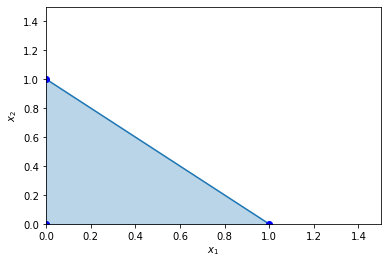

In [21]:
x_1 = np.linspace(0, 1, 1000)
x_2 = np.linspace(0, 1, 1000)

y_1 = 1 - x_1 


# plot
fig, ax = plt.subplots()

plt.plot(x_1, y_1, label=r'$x_1 + x_2 \leq 1$') # constraint 1

plt.plot(0, 0, 'bo') 
plt.plot(0, 1, 'bo') 
plt.plot(1, 0, 'bo') 

plt.xlim((0, 1.5))
plt.ylim((0, 1.5 ))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# fill in the fesaible region
plt.fill_between(x_1, 1- x_1, 0, where=(y_1 > 0), color='C0', alpha=0.3)


plt.show()

## Question 4

Implement the the linear program obtained by using the convex hull. (Use the `GLPK` solver)

In [22]:
# Define the variables 
x = cp.Variable((2,1))
# a = cp.Variable((2,1), boolean=True)


# Define the constraints 
c1 = np.array([[1],[1]])
c2 = np.array([[0],[1]])
c3 = np.array([[1],[0]])

constraints = [
    c1.T@x<=1, # x1 +x2 <=1
    c2.T@x>=0, # x1 >= 0 
    c3.T@x>=0, # x2 >= 0
]

o = np.array([[-1],[-2]]) # define o
objective = cp.Minimize(o.T@x) # define the objective

problem = cp.Problem(objective, constraints) # define the problem
problem.solve(solver=cp.GLPK) # solve it



-2.0

In [23]:
x.value # Get the value 

array([[0.],
       [1.]])

In [25]:
print(color.BOLD+'Optimal Decision Variables:'+color.END)
print('x1: {}'.format(x.value[0, 0]))
print('x2: {}'.format(x.value[1, 0]))

Optimal Decision Variables:
x1: 0.0
x2: 1.0
